In [ ]:
# Libraries
# import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Unzip file

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Files/globalterrorism.csv")
display(data.head())
print(data.shape)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


(181691, 135)


In [ ]:
data.region_txt.unique().tolist()

['Central America & Caribbean',
 'North America',
 'Southeast Asia',
 'Western Europe',
 'East Asia',
 'South America',
 'Eastern Europe',
 'Sub-Saharan Africa',
 'Middle East & North Africa',
 'Australasia & Oceania',
 'South Asia',
 'Central Asia']

In [ ]:
# select column we want to use 
data = data[["iyear", "imonth", "iday", "country", "country_txt", "region", "region_txt", "city", "success", "suicide",
             "attacktype1", "attacktype1_txt", "targtype1", "targtype1_txt", "corp1", "natlty1", "natlty1_txt", "gname",
             "motive", "nperps", "weaptype1", "weaptype1_txt", "nkill"]]

print(data.shape)
display(data.head(3))

(181691, 23)


,iyear,imonth,iday,country,country_txt,region,region_txt,city,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,corp1,natlty1,natlty1_txt,gname,motive,nperps,weaptype1,weaptype1_txt,nkill
0,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,Santo Domingo,1,0,1,Assassination,14,Private Citizens & Property,NaN,58.0,Dominican Republic,MANO-D,NaN,NaN,13,Unknown,1.0
1,1970,0,0,130,Mexico,1,North America,Mexico city,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),Belgian Ambassador Daughter,21.0,Belgium,23rd of September Communist League,NaN,7.0,13,Unknown,0.0
2,1970,1,0,160,Philippines,5,Southeast Asia,Unknown,1,0,1,Assassination,10,Journalists & Media,Voice of America,217.0,United States,Unknown,NaN,NaN,13,Unknown,1.0


In [ ]:
name = data.groupby("gname").size()
name

gname
01-may                                   10
14 K Triad                                4
14 March Coalition                        1
14th of December Command                  3
15th of September Liberation Legion       1
                                         ..
Zwai Tribe                                1
leftist guerrillas-Bolivarian militia     1
may-15                                    1
may-36                                    1
may-98                                    2
Length: 3537, dtype: int64

In [ ]:
nat = data.groupby("natlty1_txt").size()
nat

natlty1_txt
Afghanistan            10931
Albania                   97
Algeria                 2664
Angola                   429
Antigua and Barbuda        1
                       ...  
Yemen                   3123
Yugoslavia               125
Zaire                     31
Zambia                    53
Zimbabwe                  93
Length: 215, dtype: int64

In [ ]:
data = data.loc[(data['iyear'].astype(int) >= 2010)]
data = data.reset_index(drop = True)
data.head(2)

,iyear,imonth,iday,country,country_txt,region,region_txt,city,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,corp1,natlty1,natlty1_txt,gname,motive,nperps,weaptype1,weaptype1_txt,nkill
0,2010,1,1,4,Afghanistan,6,South Asia,Dwah Mande,1,0,3,Bombing/Explosion,14,Private Citizens & Property,NaN,4.0,Afghanistan,Taliban,The specific motive for the attack is unknown.,-99.0,6,Explosives,4.0
1,2010,1,1,153,Pakistan,6,South Asia,Orakzai district,1,0,3,Bombing/Explosion,14,Private Citizens & Property,NaN,153.0,Pakistan,Tehrik-i-Taliban Pakistan (TTP),The specific motive for the attack is unknown.,-99.0,6,Explosives,0.0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


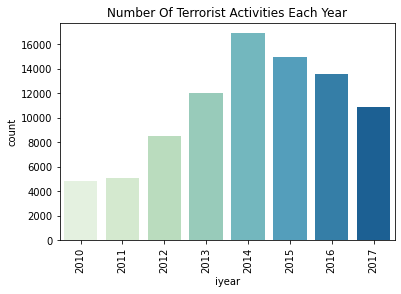

In [ ]:
  plt.subplots(figsize = (6, 4))
  sns.countplot('iyear', data = data, palette = 'GnBu')
  plt.xticks(rotation = 90)
  plt.title('Number Of Terrorist Activities Each Year')
  plt.savefig("pete2", dpi = 100)
  plt.show()

In [ ]:
data["country"].unique()

array([   4,  153,   95,   98,  182,  603,  167,    6,   92,    8,   78,
         45,  141,   94,  160,  205,  102,   69,   19,   93,  186,  104,
        147,  151,  138,  228,  110,   74,  155,  229,   11,   14,   41,
         96, 1001,   63,  195,  217,  168,   60,   97,  146,   37,   18,
         43,  130,   65,  209,  198,  203,   38,   42,  107,   34,  158,
        185,   28, 1003,  207,  213,  214,  215,  123,   44,  128,   35,
        202,   55,  161,  231,  174,   75,  142,   99,   15,  199,  119,
        200,  136,  208,  106,  103,  173,   32,   64,   54,  113,   25,
         59,  162,   88,  159,   83,  108, 1004,   91,  222,  137,   21,
         85,  118,   30,  183,  112,  122,  132,  121,   26,   53,   50,
         22,   12,   84,  201, 1002,   33,   36,   47,   58,   17,  101,
          5,   90,  144,  210,   16,  100,   56,  145,   76,  124,  111,
        184,  164,   68,  219,  218,  156,   87,   86,  179,  177,  223,
         72,  230,  157,  120,  109])

In [ ]:
countries_attack = data.groupby("country").size()
countries_attack_freq = np.sort(countries_attack)
countries_attack_freq

array([    1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     2,     2,     2,
           2,     2,     2,     2,     2,     2,     2,     2,     2,
           2,     2,     3,     3,     3,     3,     3,     3,     3,
           4,     4,     4,     4,     4,     5,     5,     5,     5,
           5,     5,     5,     5,     6,     6,     6,     6,     6,
           7,     7,     7,     8,     8,     9,     9,    10,    10,
          10,    11,    12,    12,    13,    14,    14,    14,    16,
          16,    16,    16,    17,    17,    18,    20,    21,    23,
          24,    25,    29,    32,    34,    35,    37,    40,    42,
          49,    49,    49,    54,    55,    62,    63,    66,    77,
          79,    80,    82,    86,    90,    91,    94,    98,   139,
         157,   163,   165,   206,   213,   225,   230,   254,   263,
         263,   267,   289,   309,   310,   463,   512,   562,   579,
         600,   646,

In [ ]:
primero = countries_attack.loc[countries_attack == 24636]
segundo = countries_attack.loc[countries_attack == 14368]
tercero = countries_attack.loc[countries_attack == 12731]
cuarto = countries_attack.loc[countries_attack == 11960]
quinto = countries_attack.loc[countries_attack == 8306]

print('Most attacked countries,\n1st place: {}\n\n2nd place: {}\n\n3rd place: {}\n\n4th place: {}\n\n5ft place: {}'.format(primero, segundo, tercero, cuarto, quinto))

Most attacked countries,
1st place: Series([], dtype: int64)

2nd place: Series([], dtype: int64)

3rd place: Series([], dtype: int64)

4th place: Series([], dtype: int64)

5ft place: Series([], dtype: int64)


In [ ]:
paises_df = pd.DataFrame(data)
paises_df.head(3)

,iyear,imonth,iday,country,country_txt,region,region_txt,city,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,corp1,natlty1,natlty1_txt,gname,motive,nperps,weaptype1,weaptype1_txt,nkill
0,2010,1,1,4,Afghanistan,6,South Asia,Dwah Mande,1,0,3,Bombing/Explosion,14,Private Citizens & Property,NaN,4.0,Afghanistan,Taliban,The specific motive for the attack is unknown.,-99.0,6,Explosives,4.0
1,2010,1,1,153,Pakistan,6,South Asia,Orakzai district,1,0,3,Bombing/Explosion,14,Private Citizens & Property,NaN,153.0,Pakistan,Tehrik-i-Taliban Pakistan (TTP),The specific motive for the attack is unknown.,-99.0,6,Explosives,0.0
2,2010,1,1,153,Pakistan,6,South Asia,Karachi,0,0,3,Bombing/Explosion,14,Private Citizens & Property,NaN,153.0,Pakistan,Unknown,The specific motive for the attack is unknown.,-99.0,6,Explosives,0.0


In [ ]:
paises_df = paises_df[['country', 'country_txt', 'iyear']]
paises_df.head()

,country,country_txt,iyear
0,4,Afghanistan,2010
1,153,Pakistan,2010
2,153,Pakistan,2010
3,153,Pakistan,2010
4,153,Pakistan,2010


In [ ]:
print('Most attacked countries,\n1st place: {}\n\n2nd place: {}\n\n3rd place: {}\n\n4th place: {}\n\n5ft place: {}'.format(primero, segundo, tercero, cuarto, quinto))

Most attacked countries,
1st place: Series([], dtype: int64)

2nd place: Series([], dtype: int64)

3rd place: Series([], dtype: int64)

4th place: Series([], dtype: int64)

5ft place: Series([], dtype: int64)


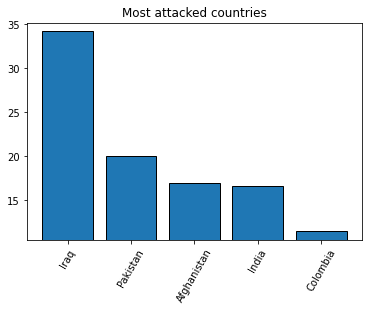

In [ ]:
# library
#import matplotlib.pyplot as plt
 
# create data
names=['Iraq', 'Pakistan', 'Afghanistan', 'India', 'Colombia']
size=[34.2, 20, 17, 16.6, 11.5]
 
# Create a circle for the center of the plot
#my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.bar(range(5), size, edgecolor='black')

plt.xticks(range(5),names, rotation=60)
plt.title("Most attacked countries")
plt.ylim(min(size)-1, max(size)+1)
#plt.pie(size, labels=names, colors = ['paleturquoise','lightskyblue','seagreen','mediumaquamarine','lightgreen'], autopct = '%1.1f%%')
#p=plt.gcf()
#p.gca().add_artist(my_circle)
#plt.savefig("pete1", dpi = 100, transparent = True)
plt.show()

## Targets

In [ ]:
data.head(3)

,iyear,imonth,iday,country,country_txt,region,region_txt,city,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,corp1,natlty1,natlty1_txt,gname,motive,nperps,weaptype1,weaptype1_txt,nkill
0,2010,1,1,4,Afghanistan,6,South Asia,Dwah Mande,1,0,3,Bombing/Explosion,14,Private Citizens & Property,NaN,4.0,Afghanistan,Taliban,The specific motive for the attack is unknown.,-99.0,6,Explosives,4.0
1,2010,1,1,153,Pakistan,6,South Asia,Orakzai district,1,0,3,Bombing/Explosion,14,Private Citizens & Property,NaN,153.0,Pakistan,Tehrik-i-Taliban Pakistan (TTP),The specific motive for the attack is unknown.,-99.0,6,Explosives,0.0
2,2010,1,1,153,Pakistan,6,South Asia,Karachi,0,0,3,Bombing/Explosion,14,Private Citizens & Property,NaN,153.0,Pakistan,Unknown,The specific motive for the attack is unknown.,-99.0,6,Explosives,0.0


In [ ]:
data.targtype1.unique()

array([14,  8,  1,  3,  2, 19, 22, 17,  7, 12, 20, 15, 21,  4, 10, 16,  6,
        9, 13, 18, 11,  5])

In [ ]:
targets = data.groupby("targtype1").size()
targets_freq = np.sort(targets)
targets_freq

array([   13,    74,    85,    86,   105,   214,   378,   413,   825,
         977,  1054,  1747,  1924,  1978,  2161,  2289,  4812,  6451,
        8639, 13331, 16318, 22941])

In [ ]:
tar1 = targets.loc[targets == 43511]
tar2 = targets.loc[targets == 27984]
tar3 = targets.loc[targets == 24506]
tar4 = targets.loc[targets == 21283]
tar5 = targets.loc[targets == 20669]
tar6 = targets.loc[targets == 6799]
tar7 = targets.loc[targets == 6023]

In [ ]:
tar1, tar2, tar3, tar4, tar5, tar6, tar7

(Series([], dtype: int64),
 Series([], dtype: int64),
 Series([], dtype: int64),
 Series([], dtype: int64),
 Series([], dtype: int64),
 Series([], dtype: int64),
 Series([], dtype: int64))

In [ ]:
data.targtype1_txt.unique()

array(['Private Citizens & Property', 'Educational Institution',
       'Business', 'Police', 'Government (General)', 'Transportation',
       'Violent Political Party', 'Terrorists/Non-State Militia',
       'Government (Diplomatic)', 'NGO', 'Unknown',
       'Religious Figures/Institutions', 'Utilities', 'Military',
       'Journalists & Media', 'Telecommunication', 'Airports & Aircraft',
       'Food or Water Supply', 'Other', 'Tourists', 'Maritime',
       'Abortion Related'], dtype=object)

In [ ]:
# Constructing DataFrame object
dr = {0 : 14, 1 : 4, 2 : 3, 3 : 2, 4: 1, 5: 19, 6: 21}
binary = {0 : 43511, 1 : 27984, 2 : 24506, 3 : 21283, 4 : 20669, 5 : 6799, 6:6023}

In [ ]:
sr = pd.Series(dr)
binn = pd.Series(binary)

In [ ]:
df = pd.DataFrame({'attacks_type': sr, 'frequency' : binn})
df

,attacks_type,frequency
0,14,43511
1,4,27984
2,3,24506
3,2,21283
4,1,20669
5,19,6799
6,21,6023


In [ ]:
col_name = 'target'
df[col_name] = None
df

,attacks_type,frequency,target
0,14,43511,None
1,4,27984,None
2,3,24506,None
3,2,21283,None
4,1,20669,None
5,19,6799,None
6,21,6023,None


In [ ]:
data.targtype1_txt

0        Private Citizens & Property
1        Private Citizens & Property
2        Private Citizens & Property
3            Educational Institution
4            Educational Institution
                    ...             
86810                       Military
86811                       Military
86812    Private Citizens & Property
86813           Government (General)
86814                        Unknown
Name: targtype1_txt, Length: 86815, dtype: object

In [ ]:
df['target'][0] = 'Business'
df['target'][1] = 'Government (Diplomatic)'
df['target'][2] = 'Journalists & Media'
df['target'][3] = 'Private Citizens & Property'
df['target'][4] = 'Educational Institution'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [ ]:
df = df.drop([5, 6], axis = 0)
df

,attacks_type,frequency,target
0,14,43511,Business
1,4,27984,Government (Diplomatic)
2,3,24506,Journalists & Media
3,2,21283,Private Citizens & Property
4,1,20669,Educational Institution


plt.figure(figsize = (5, 5))

ax = sns.countplot(y = data["attacktype1_txt"], order = data["attacktype1_txt"].value_counts().index, linewidth = 0, edgecolor = "k" * data["attacktype1_txt"].nunique(), palette = "GnBu")

for i,j in enumerate(data["attacktype1_txt"].value_counts().values):
    ax.text(.7, i, j, weight = "bold")
    
plt.title("Matches by league")
plt.show()

(array([    0., 10000., 20000., 30000., 40000., 50000.]),
 <a list of 6 Text major ticklabel objects>)

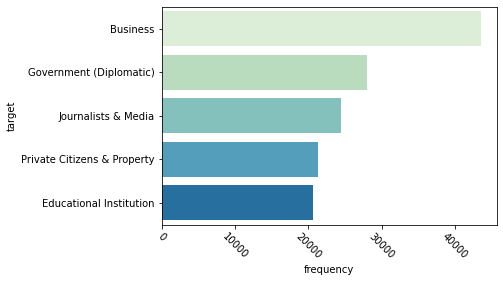

In [ ]:
sns.barplot(data = df, y = 'target', x = 'frequency', orient = 'h',palette = "GnBu")
plt.xticks(rotation = -45)

In [ ]:
data.tail(3)

,iyear,imonth,iday,country,country_txt,region,region_txt,city,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,corp1,natlty1,natlty1_txt,gname,motive,nperps,weaptype1,weaptype1_txt,nkill
86812,2017,12,31,160,Philippines,5,Southeast Asia,Kubentog,1,0,7,Facility/Infrastructure Attack,14,Private Citizens & Property,Not Applicable,160.0,Philippines,Bangsamoro Islamic Freedom Movement (BIFM),NaN,-99.0,8,Incendiary,0.0
86813,2017,12,31,92,India,6,South Asia,Imphal,0,0,3,Bombing/Explosion,2,Government (General),Forest Department Manipur,92.0,India,Unknown,NaN,-99.0,6,Explosives,0.0
86814,2017,12,31,160,Philippines,5,Southeast Asia,Cotabato City,0,0,3,Bombing/Explosion,20,Unknown,Unknown,160.0,Philippines,Unknown,NaN,-99.0,6,Explosives,0.0


## Data from 2013 - 2017

In [ ]:
ataquesg = data.loc[(data['iyear'].astype(int) >= 2007)]
ataquesg = ataquesg.reset_index(drop = True)
ataquesg.head(2)

,iyear,imonth,iday,country,country_txt,region,region_txt,city,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,corp1,natlty1,natlty1_txt,gname,motive,nperps,weaptype1,weaptype1_txt,nkill
0,2010,1,1,4,Afghanistan,6,South Asia,Dwah Mande,1,0,3,Bombing/Explosion,14,Private Citizens & Property,NaN,4.0,Afghanistan,Taliban,The specific motive for the attack is unknown.,-99.0,6,Explosives,4.0
1,2010,1,1,153,Pakistan,6,South Asia,Orakzai district,1,0,3,Bombing/Explosion,14,Private Citizens & Property,NaN,153.0,Pakistan,Tehrik-i-Taliban Pakistan (TTP),The specific motive for the attack is unknown.,-99.0,6,Explosives,0.0


In [ ]:
ataquesg.region_txt.unique().tolist()

['South Asia',
 'Middle East & North Africa',
 'Western Europe',
 'Sub-Saharan Africa',
 'Eastern Europe',
 'South America',
 'Southeast Asia',
 'Central Asia',
 'Australasia & Oceania',
 'North America',
 'Central America & Caribbean',
 'East Asia']

In [ ]:
regions ={'South Asia': 'Asia',
 'Middle East & North Africa': 'Africa',
 'Western Europe': 'Europe',
 'Sub-Saharan Africa':'Africa',
 'Eastern Europe': 'Europe',
 'South America': 'South America',
 'Southeast Asia':'Asia',
 'Central Asia' : 'Asia',
 'Australasia & Oceania':'Oceania',
 'North America': 'North America',
 'Central America & Caribbean':'Central America & Caribbean',
 'East Asia': 'Asia'}

In [ ]:
ataquesg.region_txt = ataquesg.region_txt.apply(lambda x: regions[x])

In [ ]:
ataquesg.region_txt.unique()

array(['Asia', 'Africa', 'Europe', 'South America', 'Oceania',
       'North America', 'Central America & Caribbean'], dtype=object)

In [ ]:
ataquesgg = ataquesg.groupby("region_txt").size()
ataquesgg_freq = np.sort(ataquesgg)
ataquesgg_freq

array([   30,    47,   378,  1359,  4481, 36231, 44289])

In [ ]:
#ataquesgg

In [ ]:
ataques13 = ataquesg.loc[(ataquesg['iyear'].astype(int) == 2013)]
ataques13 = ataques13.reset_index(drop = True)
ataques13.head(2)

,iyear,imonth,iday,country,country_txt,region,region_txt,city,success,suicide,...,targtype1_txt,corp1,natlty1,natlty1_txt,gname,motive,nperps,weaptype1,weaptype1_txt,nkill
0,2013,1,1,153,Pakistan,6,Asia,Bannu,0,0,...,Police,Pakistani Police,153.0,Pakistan,Unknown,NaN,-99.0,6,Explosives,0.0
1,2013,1,1,95,Iraq,10,Africa,Tuz Khormato,1,0,...,Private Citizens & Property,Not Applicable,95.0,Iraq,Unknown,NaN,-99.0,6,Explosives,1.0


In [ ]:
ataquesgg13 = ataques13.groupby("region_txt").size()
ataquesgg13_freq = np.sort(ataquesgg13)
ataquesgg13_freq

array([   1,   14,   32,  182,  426, 5559, 5822])

In [ ]:
ataquesgg13

region_txt
Africa                         5559
Asia                           5822
Central America & Caribbean      14
Europe                          426
North America                    32
Oceania                           1
South America                   182
dtype: int64

In [ ]:
ataques17 = ataquesg.loc[(ataquesg['iyear'].astype(int) == 2014)]
ataques17 = ataques17.reset_index(drop = True)
ataques17.head(2)

,iyear,imonth,iday,country,country_txt,region,region_txt,city,success,suicide,...,targtype1_txt,corp1,natlty1,natlty1_txt,gname,motive,nperps,weaptype1,weaptype1_txt,nkill
0,2014,1,1,45,Colombia,3,South America,Convencion,1,0,...,Utilities,Cano Limon-Covenas Oil Pipeline,45.0,Colombia,National Liberation Army of Colombia (ELN),"The specific motive is unknown; however, sourc...",-99.0,6,Explosives,0.0
1,2014,1,1,182,Somalia,11,Africa,Mogadishu,1,1,...,Business,Jazeera Palace Hotel,182.0,Somalia,Al-Shabaab,NaN,2.0,6,Explosives,4.0


In [ ]:
ataquesgg17 = ataques17.groupby("region_txt").size()
ataquesgg17_freq = np.sort(ataquesgg17)
ataquesgg17

region_txt
Africa                         9260
Asia                           6132
Central America & Caribbean       5
Europe                         1177
North America                    37
Oceania                           9
South America                   283
dtype: int64

### america

In [ ]:
norte = ataquesg.loc[(ataquesg['region_txt'].astype(str) == 'North America')]
norte = norte.reset_index(drop = True)

In [ ]:
sur = ataquesg.loc[(ataquesg['region_txt'].astype(str) == 'South America')]
sur = sur.reset_index(drop = True)

In [ ]:
centro = ataquesg.loc[(ataquesg['region_txt'].astype(str) == 'Central America & Caribbean')]
centro = centro.reset_index(drop = True) 

In [ ]:
america = pd.concat([norte, centro, sur])
america.shape

(1767, 23)

In [ ]:
america13 = america.loc[(america['iyear'].astype(int) == 2017)]
america13 = america13.reset_index(drop = True)

In [ ]:
america13_2 = america13.groupby("region_txt").size()
#ataquesgg17_freq = np.sort(ataquesgg17)
america13_2

region_txt
Central America & Caribbean      4
North America                   97
South America                  172
dtype: int64

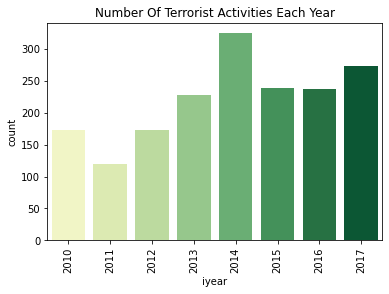

In [ ]:
plt.subplots(figsize = (6, 4))
sns.countplot('iyear', data = america, palette = 'YlGn')
plt.xticks(rotation = 90)
plt.title('Number Of Terrorist Activities Each Year')
plt.savefig("pete4", dpi = 100)
plt.show()

In [ ]:
america2 = america13.groupby("region_txt").size()
#ataquesgg17_freq = np.sort(ataquesgg17)
america2

region_txt
Central America & Caribbean      4
North America                   97
South America                  172
dtype: int64

In [ ]:
america3 = america13.groupby("country_txt").size()
#ataquesgg17_freq = np.sort(ataquesgg17)
america3

country_txt
Argentina               3
Brazil                  2
Canada                 12
Chile                  12
Colombia              117
Dominican Republic      1
Ecuador                 3
Honduras                1
Jamaica                 2
Mexico                 20
Paraguay               10
Peru                    8
United States          65
Venezuela              17
dtype: int64

In [ ]:
dr1 = {0 : 4, 1 : 97, 2 : 172}
binary1 = {0 : 'Central America & Caribbean', 1 : 'North America ', 2 : 'South America'}

In [ ]:
sr1 = pd.Series(dr1)
binn1 = pd.Series(binary1)

In [ ]:
df1 = pd.DataFrame({'region': binn1, 'frequency' : sr1})
df1

,region,frequency
0,Central America & Caribbean,4
1,North America,97
2,South America,172


In [ ]:
display(df1)

,region,frequency
0,Central America & Caribbean,4
1,North America,97
2,South America,172


(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 <a list of 9 Text major ticklabel objects>)

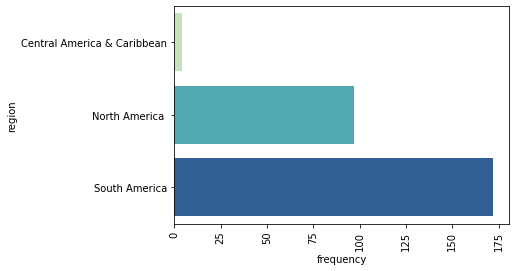

In [ ]:
sns.barplot(data = df1, y = 'region', x = 'frequency', orient = 'h',palette = "YlGnBu")
plt.xticks(rotation = 90)


north_america = ataques10.loc[(ataques10['region_txt'].astype(str) == 'North America')]
north_america = north_america.reset_index(drop = True)
north_america.region_txt.unique()

caribbean = ataques10.loc[(ataques10['region_txt'].astype(str) == 'Central America & Caribbean')]
caribbean = caribbean.reset_index(drop = True)
caribbean.region_txt.unique()

america = pd.concat([north_america, caribbean, south_america])
america = america.reset_index(drop = True)
america.region_txt.unique().tolist()

america.head(2)

america10 = america.loc[(america['iyear'].astype(int) == 2010)]
america10 = america10.reset_index(drop = True)
america10.region_txt.unique().tolist()

america10.shape

america17 = america.loc[(america['iyear'].astype(int) == 2017)]
america17 = america17.reset_index(drop = True)
america17.region_txt.unique().tolist()

america17.shape

america10_atack = america.groupby("region_txt").size()
america10_atack_freq = np.sort(america10_atack)
america10_atack_freq

america10_atack

# **Bibliography**

In [ ]:
# terrorism data set
# https://www.kaggle.com/START-UMD/gtd

# https://www.kaggle.com/hugomathien/soccer#database.sqlite
# https://www.kaggle.com/pavanraj159/european-football-data-analysis